# Regression Linear Model I: Ordinary Least Squares (OLS)

In this notebook we study the first linear model for regression, i.e., the Ordinary Least Squares (OLS) linear model. We will start with the theoretical background giving the details of how it works in theory, giving also a geometrical intuition. We will use the notation we already set in the introductionary file for Supervised Learning (Supervised_Learning.ipynb). Therefore, we invite the reader to read that file before starting to focus on this. This notebook is structured as follows

- [Theoretical Analysis:](#s1)
    - [Algorithm](#s1.1)
    - [Geometrical Interpretation](#s1.2)
    - [Statistical Analysis: Bias-Variance](#s1.3)
    
- [Implementation in Python](#s2)
- [Mini-challenge](#s3)

<a id='s1'></a>
## Theoretical Analysis

As explained in the introduction to supervised model the objective is to find an estimator $f\in \mathcal{H}$ (notice we suppressed the index $N$ with respect the section in the introduction notebook) that predicts well new data by minimizing the risk function:

\begin{align*}
\mathcal{R}(f)=E\left[L(f(x),y)\right]=\int L(f(x),y)dP(x,y)
\end{align*}

where $L(f(x),y)$ is the  loss function and $P(x,y)$ is the joint probability distribution.  The ultimate goal of a learning algorithm is to find a function $\hat{f}$ for which the risk $\mathcal{R}(\hat{f})$ is minimal, among the fixed class of function $\mathcal{H}$:

\begin{align*}
\hat{f}=\arg\min_{f\in\mathcal{H}} \mathcal{R}(f)
\end{align*}


Since the statistician cannot compute the expectation (and thus the risk) because he does not know the distribution $P(x,y)$, it's common to replace the risk with an estimatore of the risk, called the empirical risk:

\begin{align*}
\hat{\mathcal{R}}(f)=\frac{1}{N}\sum_{i=1}^NL(f(x_i),y_i)
\end{align*}


where $x_i$ is the row vector if the $i$-th observation and $y_i$ the output variable of the associated input row. We seek for a function:

\begin{align*}
\hat{f}=\arg\min_{f\in\mathcal{H}} \hat{\mathcal{R}}(f)
\end{align*}

###  <a class="anchor" id='s1.1'>Algorithm</a> 

In linear model we put contraints on the space of all the function by restricting ourselves to the class of linear function, therefore we will have, for a single observation $x_i$:

\begin{align*}
f(x_i)=\theta_0 + \sum_{j=1}^p x_{ij}\theta_j
\end{align*}

where $\theta_j$ with $j=0,\cdots d$ is the vector of parameter we have to estimate. In this sense we bring the problem to a problem of optimization. To do that we should also choose a loss function thanks to which we will define the risk function to minimize. The loss function in the OLS model is the function which gives the name to the model and it's given by

\begin{align*}
L(f(x),y)= (y-f(x))^2
\end{align*}

Unifying the notation and taking into account all the $N$ observation instead of just one we denote the input dataset by a matrix $N\times (p+1)$, $X$ whose component are denoted by $x_{ij}$ with $i=1,\cdots, N$ running over all the observations, and $j=0,1,\cdots, p$ running over all the features. Note that there is an additional $0$-vector that is a vector of ones useful to write in a compact form the scalar product between the matrix and the parameter vector $\theta=\left(\theta_0,\theta_1,\cdots, \theta_p\right)\in \mathbb{R}^p$. The output will be denoted by $Y=\left(y_1,y_2,\cdots y_N\right)^T\in \mathbb{R}^N$ and the predicted value vector will always be labelled by $\hat{Y}$.

The empirical risk function to minimize will be therefore a function of $\theta$ and it reads:


\begin{align*}
\hat{\mathcal{R}}(\theta)&=\frac{1}{N}||Y-f(X)||^2\\
                         &=\frac{1}{N}(Y-X\cdot\theta)(Y-X\cdot\theta)^T\\   
                         &=\frac{1}{N}\sum_{i=1}^{N}\left((y_i-\sum_{j=0}^p\theta_jx_{ji})^2\right)\\  
\end{align*}




To minimize the emprical risk we have to compute the gradient and the Hessian with respect to $\theta$ that it reads:

\begin{align*}
\nabla\hat{\mathcal{R}}(\theta)&=-\frac{2}{N}X^T(Y-X\cdot\theta)\\
\nabla^2\hat{\mathcal{R}}(\theta)&=2X^T\cdot X    
\end{align*}


If $\text{rank}(X^T\cdot X )=p$ the $p\times p$ matrix is invertible and positive definite and the unique solution for which the gradient is zero, so that the risk is minimum reads:

\begin{align*}
\hat{\theta}=\left[\left(X^T\cdot X\right)^{-1}X^T\right]\cdot Y
\end{align*}

so that the estimated function $\hat{f}$ which give the prediction $\hat{Y}$  will read

\begin{align*}
\hat{Y}=\hat{f}(X)=\hat{\theta}\cdot X
\end{align*}

###  <a class="anchor" id='s1.2'>Geometrical Interpretation</a> 

The linear model seeks to model the output vector $Y\in\mathbb{R}^N$ by a linear combination of the form $X\cdot\theta\in\mathbb{R}^N$. The image of $X$ is the vector subspace of $\mathbb{R}^N$ generated by the $p<N$ columns of the $X$ matrix. As $\text{rank}(X)=p$, it is of dimension d. When minimizing the empirical risk we ask for a vanishing gradient and this condition is expressed  in the formula (see above)

\begin{align*}
X^T(Y-X\cdot\theta)=  0
\end{align*}

Therefore by choosing $\hat{\theta}$ who kills the above gradient we are imposing the equivalent condition

\begin{align*}
X^T\cdot(Y-X\cdot\hat{\theta})=  0
\end{align*}

or in other words  $X^T(Y-\hat{Y})=  0$ that is suggesting us that the resulting estimate $\hat{Y}$ is the orthogonal projection of $Y$ onto the subspace generated by the $d$ $N$-vector columns of $X$. The projection matrix is

\begin{align*}
P_X=X\left(X^T\cdot X\right)^{-1}X^T
\end{align*}

<div>
<img width=400 src='images/P_X.png' /> 
</div>

###  <a class="anchor" id='s1.3'>Statistical Analysis: Bias-Variance</a> 

From previous sections we saw that the learnign algorithms work minimizing the risk function on a given, known dataset, that we usually call, training dataset. Once we made the assumption also on the relation between the output and input data, in this case linear, the problem becomes a optimization problem on the parameters of the function chosen. On the other side we don't know how our model behave when applied to new, unseen data. We must have a way to test the performance of our model on new data, and look if there is a way to assess and tuning the parameters of the model in order to make it optimal. This problem has to do with the Bias-Variance Tradeoff and in general, concern the question on how our model is closed to the real one.


The main assumption of the linear model, that also allow us to use it, is that the real output variable $Y$ is of the form

\begin{align*}
y_i=x_i^T\theta+\epsilon_i
\end{align*}

where $E(\epsilon_i)=0$, $\text{Var}(\epsilon_i)=\sigma^2$, and $\theta$ a deterministic, non random, parameter. This expression above simply tell us how the data behave and where they come from. It's what we call the real model. The purpose now is compare our predicted model with the real model and look if there is some way to optimize it. To do so we will study the loss function $L(y_i, \hat{y}_i)$ on a new unseen data $(x_i,y_i)$.

From the section 'Bias-Variance Tradeoff' of Supervised_Learning file we saw that the loss function can be decomposed, in general, into three terms, called irreducible error, Bias, and Variance

\begin{align*}
L(y_i, \hat{y}_i)&=E\left[(y_i-\hat{f}(x_i))^2 \right]\\
&=\sigma^2+\left[f(x_i)-E[\hat{f}(x_i)] \right]^2 + E\left[\hat{f}(x_i)-E[\hat{f}(x_i)] \right]^2\\
&=\sigma^2 + \text{Bias}^2\left(\hat{f}(x_i)\right) + \text{Var}\left(\hat{f}(x_i)\right)\\
\end{align*}

Now we study each of them separately for the linear model case

\begin{align*}
\text{Bias}\left(\hat{f}(x_i)\right)&=f(x_i)-E[\hat{f}(x_i)]\\
&=x_i^T\theta-E[x_i^T\hat{\theta}]\\
&=x_i^T\theta-E\left[x_i^T\left(\left(X^T\cdot X\right)^{-1}X^T\cdot Y\right)\right]\\
&=x_i^T\theta-E\left[x_i^T\left(\left(X^T\cdot X\right)^{-1}X^T\cdot (X\theta+\epsilon)\right)\right]\\
&=x_i^T\theta-E\left[x_i^T\theta\right]-E\left[x_i^T\left(\left(X^T\cdot X\right)^{-1}X^T\epsilon\right)\right]\\
&=-E\left[x_i^T\left(\left(X^T\cdot X\right)^{-1}X^T\epsilon\right)\right]
\end{align*}

where $E[\cdot]$ is intended to be estimator over everything that is random. In the last step we used the fact that $E\left[x_i^T\theta\right]=x_i^T\theta$ because of deterministicness of the real model. Now, in principle if we consider $X$ of the training set $(X,Y)$ to be a random variable (_random design_) we should take the expectation value either over $X$ and $\epsilon$. Here we consider what we call _fixed design_ where the input dataset of the training set is fixed and doesn't change in the fit procedure. Given this, even the last term survived vanishes beacuse $E(\epsilon_i)=0$. So we have 

\begin{align*}
\text{Bias}=0
\end{align*}

With very similar manipulation it can be shown that the variance of the linear model reads

\begin{align*}
\text{Var}\left(\hat{f}(x_i)\right)=\sigma^2\left[x_i^T\left(X^T\cdot X\right)^{-1}x_i\right]
\end{align*}

Therefore in summary, the linear model, is an unbiased model with a variance given by the expression above, that, for diemensional argumenti goes like $\sim\sigma^2\frac{p}{N}$. Reducing the features leads to a smaller variance. 

##  <a class="anchor" id='s2'>Implementation in Python</a> 

The class `LinearRegression` of the module `sklearn.linear_model` is:

`sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)`

Since it's a class is composed by __parameters__, __attributes__ and __method__. All the details of the `LinearRegression` class can be found on [this page](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares)  

##  <a class="anchor" id='s3'>Mini-challenge</a> 

We apply here `LinearRegression` to the dataset of price apartements in Paris. The explanation and the details of the dataset can be found in the README.md file. The mini-challenge has the following structure:

- __Inizialization__
- __Exploration of Data__
- __Model Selection__
- __Model Assessment__
- __Interpretability__

### Inizialization

In [2]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RepeatedKFold
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

from eli5.sklearn import PermutationImportance
from pdpbox import pdp, info_plots
from sklearn.utils.random import sample_without_replacement

import warnings
warnings.filterwarnings("ignore")

### Exploration of Data

In [3]:
df=pd.read_csv('data/dataset_paris.csv')

In [4]:
df.head()

,bathrooms,bedrooms,beds,is_fully_refundable,is_host_highly_rated,is_new_listing,latitude,longitude,person_capacity,weekly_factor,...,Kitchen,Breakfast,Essentials,available,local_price,min_nights,week_number,entire_home,private_room,shared_room
0,2.0,1.0,1.0,1,0,1,48.869292,2.348335,1,1.0,...,1,0,1,1.000000,47.000000,1.0,35,0,1,0
1,2.0,1.0,1.0,1,0,1,48.869292,2.348335,1,1.0,...,1,0,1,1.000000,47.000000,1.0,36,0,1,0
2,2.0,1.0,1.0,1,0,1,48.869292,2.348335,1,1.0,...,1,0,1,0.857143,47.000000,1.0,37,0,1,0
3,2.0,1.0,1.0,1,0,1,48.869292,2.348335,1,1.0,...,1,0,1,0.142857,43.571429,1.0,38,0,1,0
4,2.0,1.0,1.0,1,0,1,48.869292,2.348335,1,1.0,...,1,0,1,0.000000,43.571429,1.0,39,0,1,0


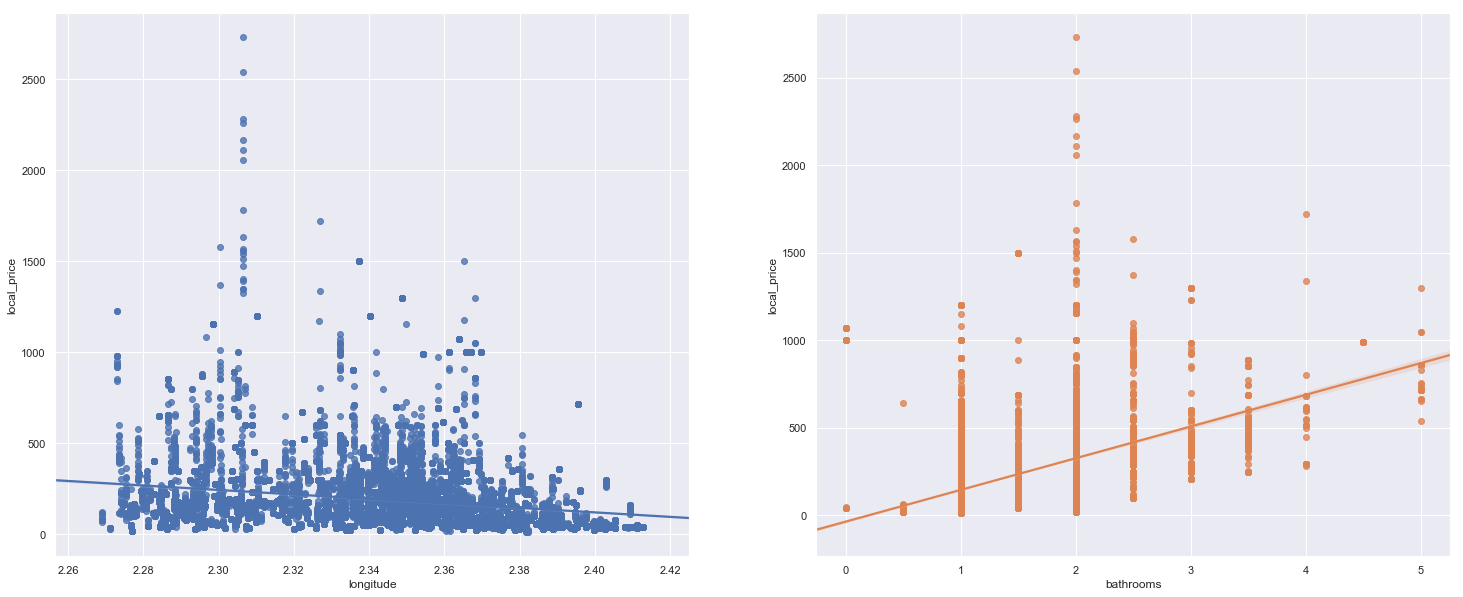

In [43]:
sns.set(color_codes=True)
fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(25,10),squeeze=False)
sns.regplot(x='longitude', y='local_price', data=df, ax=axs[0][0])
sns.regplot(x='bathrooms', y='local_price', data=df, ax=axs[0][1])


### Model Selection

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('local_price',axis=1), df.local_price, shuffle=True, train_size=0.8, random_state=42)

In [28]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
print("Score train : {:2.1f}%".format(r2_score(y_train, model.predict(X_train)) * 100))
print("Score test : {:2.1f}%".format(r2_score(y_test, model.predict(X_test)) * 100))

Score train : 48.3%
Score test : 44.1%


### Model Assessment

In [30]:
def r2(rep):
    rkf= RepeatedKFold(n_splits=5, n_repeats=rep, random_state=True)
    r2=[]
    
    for train_I, test_I in rkf.split(df):
        X_fold_train = df.iloc[train_I, :].drop('local_price',axis=1)
        y_fold_train = df['local_price'].values[train_I]
        X_fold_test = df.iloc[test_I, :].drop('local_price',axis=1)
        y_fold_test = df['local_price'].values[test_I]
        model = LinearRegression()
        model.fit(X_fold_train, y_fold_train)
        r2.append(r2_score(y_fold_test, model.predict(X_fold_test)))
    print('The estimation of the r2 score over the test distributions is:', "{:2.2f}%".format(np.mean(r2)*100), '$\u00B1 $', np.std(r2))
    print("The confidence interval is [{:2.1f}%, {:2.1f}%]".format(*np.quantile(r2, q=[0.025, 0.975]) * 100))
    
    return r2

The estimation of the r2 score over the test distributions is: 47.26% $± $ 0.02134389327115622
The confidence interval is [43.1%, 51.4%]


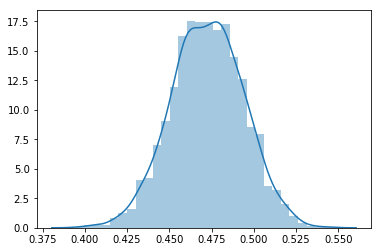

In [31]:
sns.distplot(r2(500),bins=30)

Text(0, 0.5, 'Residual')

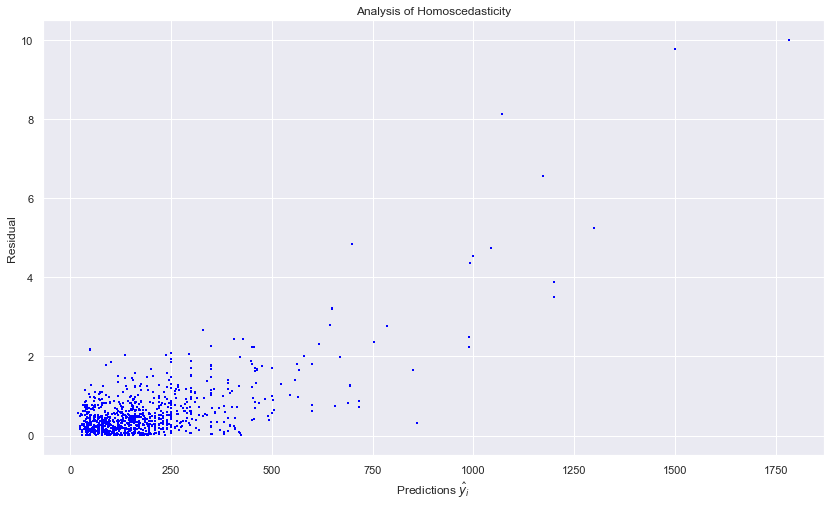

In [49]:
X_res = df.sample(n=1000)
n, p = X_res.shape
X_val = X_res.drop(['local_price'], axis=1).values
y_val = X_res['local_price']
residuals = np.abs(y_val - model.predict(X_val)).values
H = np.matmul(X_val, np.linalg.solve(np.dot(X_val.T, X_val), X_val.T))
std_hat = np.dot(residuals, residuals) / (n - p)
standart_residuals = np.asarray([residuals[i] / np.sqrt(std_hat * (1 - H[i, i])) for i in range(len(residuals))])

plt.figure(figsize=(14, 8))
plt.scatter(y_val, standart_residuals, s=2, c="blue", edgecolors="blue",marker='+')
plt.title("Analysis of Homoscedasticity")
plt.xlabel("Predictions $\hat{y}_i$")
plt.ylabel("Residual")

### Intepretability 

In [172]:
df.head()

,bathrooms,bedrooms,beds,is_fully_refundable,is_host_highly_rated,is_new_listing,latitude,longitude,person_capacity,weekly_factor,...,Kitchen,Breakfast,Essentials,available,local_price,min_nights,week_number,entire_home,private_room,shared_room
0,2.0,1.0,1.0,1,0,1,48.869292,2.348335,1,1.0,...,1,0,1,1.000000,47.000000,1.0,35,0,1,0
1,2.0,1.0,1.0,1,0,1,48.869292,2.348335,1,1.0,...,1,0,1,1.000000,47.000000,1.0,36,0,1,0
2,2.0,1.0,1.0,1,0,1,48.869292,2.348335,1,1.0,...,1,0,1,0.857143,47.000000,1.0,37,0,1,0
3,2.0,1.0,1.0,1,0,1,48.869292,2.348335,1,1.0,...,1,0,1,0.142857,43.571429,1.0,38,0,1,0
4,2.0,1.0,1.0,1,0,1,48.869292,2.348335,1,1.0,...,1,0,1,0.000000,43.571429,1.0,39,0,1,0


#### Feature Importance

In [206]:
perm = PermutationImportance(model, random_state=1, n_iter=10).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.3426 ± 0.0230,person_capacity
0.1141 ± 0.0126,bathrooms
0.0827 ± 0.0065,beds
0.0603 ± 0.0117,available
0.0440 ± 0.0072,longitude
0.0322 ± 0.0064,bedrooms
0.0169 ± 0.0066,Kitchen
0.0077 ± 0.0018,latitude
0.0076 ± 0.0032,is_fully_refundable
0.0043 ± 0.0015,Essentials


#### Partial Dependence Plot (PDP)

In [174]:
X_pdp = X_train.iloc[sample_without_replacement(X_train.shape[0], int(X_train.shape[0])), :]
X_pdp['target'] = model.predict(X_pdp)

In [175]:
X_pdp.head()

,bathrooms,bedrooms,beds,is_fully_refundable,is_host_highly_rated,is_new_listing,latitude,longitude,person_capacity,weekly_factor,...,Kitchen,Breakfast,Essentials,available,min_nights,week_number,entire_home,private_room,shared_room,target
3599,1.0,1.0,1.0,1,1,0,48.858164,2.389711,2,1.00,...,1,0,1,0.000000,6.000000,43,1,0,0,62.860857
10059,2.0,2.0,3.0,1,0,0,48.858938,2.374595,4,0.92,...,1,1,1,0.142857,2.000000,43,1,0,0,224.874383
4281,1.0,1.0,1.0,1,0,0,48.855383,2.323603,2,1.00,...,1,0,1,0.000000,2.000000,41,1,0,0,120.749180
12510,1.0,1.0,1.0,1,1,0,48.859551,2.274201,3,1.00,...,1,0,1,0.714286,2.285714,43,1,0,0,257.306474
7231,1.0,0.0,1.0,1,0,0,48.852005,2.304714,1,0.85,...,1,0,1,0.000000,7.000000,46,1,0,0,74.324646


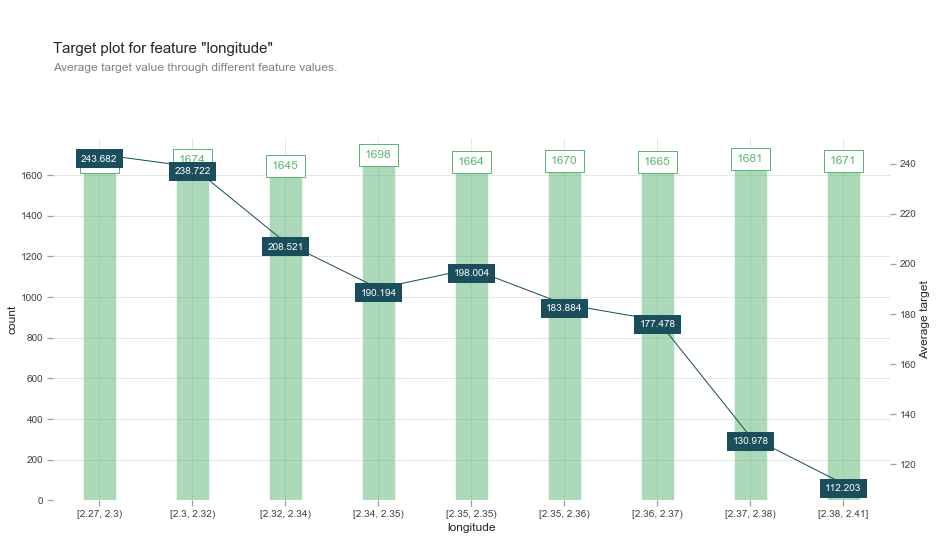

In [183]:
fig, axes, summary_df = info_plots.target_plot(
    df=X_pdp, feature='longitude', feature_name='longitude', target='target'
)